<a href="https://colab.research.google.com/github/raj142006/Bus-Reservation-System/blob/main/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_gene_expression.csv to synthetic_gene_expression.csv


In [ ]:

df = pd.read_csv("synthetic_gene_expression.csv")
df.head()


Sample_ID       Gene1       Gene2       Gene3       Gene4       Gene5  \
0  Sample_1  374.540119  950.714306  731.993942  598.658484  156.018640   
1  Sample_2  607.544852  170.524124   65.051593  948.885537  965.632033   
2  Sample_3  388.677290  271.349032  828.737509  356.753327  280.934510   
3  Sample_4  119.594246  713.244787  760.785049  561.277198  770.967180   
4  Sample_5  807.440155  896.091300  318.003475  110.051925  227.935163   

        Gene6       Gene7       Gene8       Gene9  ...      Gene22  \
0  155.994520   58.083612  866.176146  601.115012  ...  139.493861   
1  808.397348  304.613769   97.672114  684.233027  ...  775.132823   
2  542.696083  140.924225  802.196981   74.550644  ...  623.298127   
3  493.795596  522.732829  427.541018   25.419127  ...  161.221287   
4  427.107789  818.014766  860.730583    6.952131  ...  251.782296   

       Gene23      Gene24      Gene25      Gene26      Gene27      Gene28  \
0  292.144649  366.361843  456.069984  785.175961  199.673782  514.234438   
1  939.498942  894.827350  597.899979  921.874235   88.492502  195.982862   
2  330.898025   63.558350  310.982322  325.183322  729.606178  637.557471   
3  929.697652  808.120380  633.403757  871.460590  803.672077  186.570059   
4  497.248506  300.878310  284.840494   36.886947  609.564334  502.679023   

       Gene29      Gene30   Label  
0  592.414569   46.450413  Normal  
1   45.227289  325.330331   Tumor  
2  887.212743  472.214925   Tumor  
3  892.558998  539.342242   Tumor  
4   51.478751  278.646464   Tumor  

[5 rows x 32 columns]

In [ ]:
X = df.drop(['Sample_ID', 'Label'], axis=1)
y = df['Label']
feature_names = X.columns.tolist()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

best_model = None
best_accuracy = 0
best_model_name = ""

print("🔍 Accuracy Scores:")

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"{name}: {acc*100:.2f}%")

    if acc > best_accuracy:
        best_model = model
        best_accuracy = acc
        best_model_name = name

print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {best_accuracy*100:.2f}%")


🔍 Accuracy Scores:
Logistic Regression: 30.00%
Random Forest: 60.00%
SVM: 60.00%
KNN: 50.00%

🏆 Best Model: Random Forest with Accuracy: 60.00%


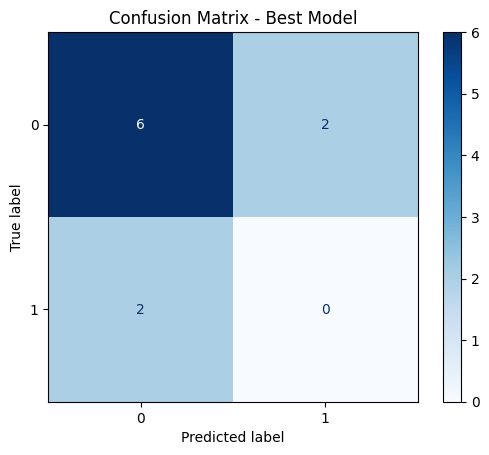

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Best Model")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted', color='red', linestyle='--', linewidth=2)

plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Target Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


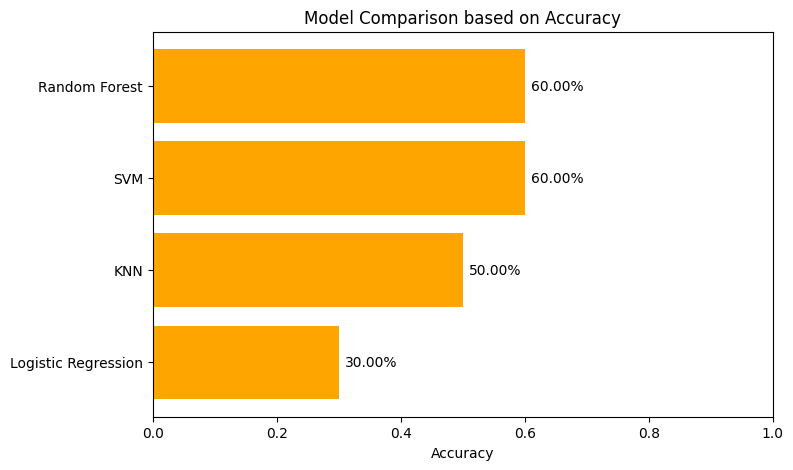

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
model_accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc
model_accuracies = dict(sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(8, 5))
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='orange')
plt.xlabel("Accuracy")
plt.title("Model Comparison based on Accuracy")
plt.xlim(0, 1)
for i, v in enumerate(model_accuracies.values()):
    plt.text(v + 0.01, i, f"{v*100:.2f}%", va='center')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
print("\n🧬 Enter 30 gene expression values (comma-separated):")
input_str = input()



🧬 Enter 30 gene expression values (comma-separated):
12.5, 14.2, 13.8, 15.0, 14.6, 16.1, 15.8, 14.9, 15.4, 16.7, 17.2, 16.8, 18.0, 17.5, 18.4, 19.1, 18.9, 19.5, 20.2, 19.8, 21.0, 20.7, 21.5, 22.0, 21.8, 22.6, 23.0, 22.9, 23.5, 24.0


In [ ]:
try:
    input_values = [float(x.strip()) for x in input_str.split(",")]
    if len(input_values) != 30:
        print("⚠️ Please enter exactly 30 values!")
    else:
        input_df = pd.DataFrame([input_values], columns=feature_names)
        input_scaled = scaler.transform(input_df)
        input_pca = pca.transform(input_scaled)
        prediction = best_model.predict(input_pca)
        print("🔮 Prediction for Your Input:", prediction[0])
except:
    print("❌ Invalid input. Please enter numeric values only.")


🔮 Prediction for Your Input: Tumor


In [ ]:
!pip install shap


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import pandas as pd
df = pd.read_csv("synthetic_gene_expression.csv")
X = df.drop(['Sample_ID', 'Label'], axis=1)
y = df['Label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)
best_model = LogisticRegression()
best_model.fit(X_train, y_train)
acc = accuracy_score(y_test, best_model.predict(X_test))
print(f"✅ Logistic Regression Accuracy: {acc*100:.2f}%")


✅ Logistic Regression Accuracy: 30.00%


In [ ]:
!pip install shap
import shap
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)
shap.initjs()
shap.summary_plot(shap_values, X_test, feature_names=["PC1", "PC2"])
shap.waterfall_plot(shap_values[0], max_display=2)


In [ ]:

from lime.lime_tabular import LimeTabularExplainer

# Create LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train,
    mode="classification",
    feature_names=["PC1", "PC2"],
    class_names=["Normal", "Tumor"],
    discretize_continuous=True
)

# Explain the first test sample
lime_exp = lime_explainer.explain_instance(
    data_row=X_test[0],
    predict_fn=best_model.predict_proba,
    num_features=2
)

# Visualize in notebook
lime_exp.show_in_notebook(show_table=True, show_all=False)

# Save to HTML file for external viewing
lime_exp.save_to_file("lime_explanation.html")
print("LIME explanation saved as lime_explanation.html")


LIME explanation saved as lime_explanation.html


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Calculate Permutation Feature Importance
pfi_results = permutation_importance(
    best_model,
    X_test,
    y_test,
    scoring='accuracy',   # or 'accuracy' for classification
    n_repeats=10,
    random_state=42
)

# Sort features by importance
sorted_idx = pfi_results.importances_mean.argsort()

# Plot PFI
plt.figure(figsize=(8, 5))
plt.barh(
    np.array(["PC1", "PC2"])[sorted_idx],  # Replace with your feature names
    pfi_results.importances_mean[sorted_idx],
    xerr=pfi_results.importances_std[sorted_idx],
    color="skyblue",
    edgecolor="black"
)
plt.xlabel("Mean Importance Score")
plt.ylabel("Features")
plt.title("Permutation Feature Importance (PFI)")
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# === PCA scatter plot ===
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df['Label'] = y.values

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2',
    hue='Label', s=90, palette='Set2', edgecolor='k'
)
plt.title("PCA scatter: PC1 vs PC2 (Tumor vs Normal)")
plt.xlabel(f"PC1 ({explained_variance_ratio[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]*100:.1f}% var)")
plt.legend(title='Label')
plt.tight_layout()
plt.show()

# === Top genes by SHAP contribution for one sample ===
# Assuming gene_shap_series is available from previous SHAP analysis
# If not, this section will cause an error and needs the SHAP analysis to be run first
try:
    top_genes = gene_shap_series.abs().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,6))
    sns.barplot(x=top_genes.values, y=top_genes.index, palette='coolwarm')
    plt.title("Top Gene Contributions (SHAP) — Selected Sample")
    plt.xlabel("Absolute SHAP Value")
    plt.tight_layout()
    plt.show()
except NameError:
    print("\n⚠️ SHAP analysis has not been performed yet. Please run the SHAP analysis cells first to see the gene contribution plots.")


# === Top genes by mean absolute SHAP across multiple samples ===
# Assuming mean_abs_gene_shap_series is available from previous SHAP analysis
# If not, this section will cause an error and needs the SHAP analysis to be run first
try:
    top_mean_genes = mean_abs_gene_shap_series.sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,6))
    sns.barplot(x=top_mean_genes.values, y=top_mean_genes.index, palette='magma')
    plt.title("Top Genes by Mean |SHAP| Across Test Samples")
    plt.xlabel("Mean |SHAP|")
    plt.tight_layout()
    plt.show()
except NameError:
     print("\n⚠️ SHAP analysis has not been performed yet. Please run the SHAP analysis cells first to see the mean SHAP gene contribution plots.")


⚠️ SHAP analysis has not been performed yet. Please run the SHAP analysis cells first to see the gene contribution plots.

⚠️ SHAP analysis has not been performed yet. Please run the SHAP analysis cells first to see the mean SHAP gene contribution plots.
